# Métodos para buscar raíces

## Método de bisección 
Para aplicar este método consideremos tres sucesiones $a_n \le p_n \le b_n$ definidas por las siguientes relaciones

$$ p_n = \frac{a_n+b_n}{2},
\quad a_{n+1} = \begin{cases}
a_n & \mbox{si } f(a_n)\cdot f(p_n) <0 \\
p_n & \mbox{si } f(a_n)\cdot f(p_n) > 0\end{cases},
\quad b_{n+1} = \begin{cases}
b_n & \mbox{si } f(b_n)\cdot f(p_n) < 0 \\
p_n & \mbox{si } f(b_n)\cdot f(p_n) > 0\end{cases}$$

Donde los valores iniciales vienen dados por:

$$a_0 := a, \quad b_0 := b.$$

Se puede probrar que las tres sucesiones convergen al valor de la única raíz del intervalo:

$$ \lim_{n \to \infty} a_n = \lim_{n \to \infty} p_n = \lim_{n \to \infty} b_n.$$

### Ejemplo método de bisección

Para la función $f(x) = x^3-x-2$

In [8]:
function biseccion(a,b)
    p = (a+b)/2
    f(x) = x^3-x-2
    for i in 1:50
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

In [9]:
biseccion(0,2)

(1.5213797068045674, -1.3322676295501878e-15)

# Graficación usando matplotlib

## Graficas usando PyPlot: Ejemplo 1

In [10]:
using PyPlot

In [5]:
x=range(-10,10, step= 0.0001);
y=cos.(x);

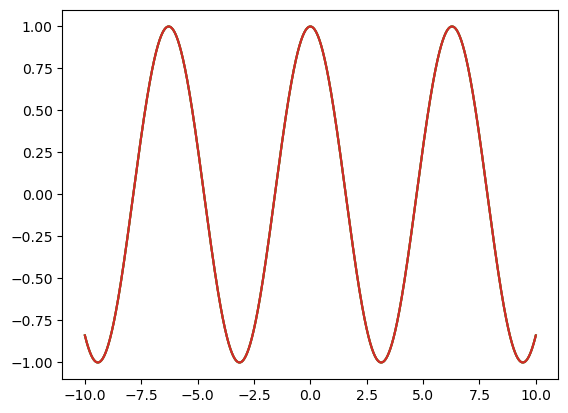

In [12]:
plot(x,y); # la sintaxis es muy parecida a matlab
gcf()

* matplotlib brinda mas opciones:

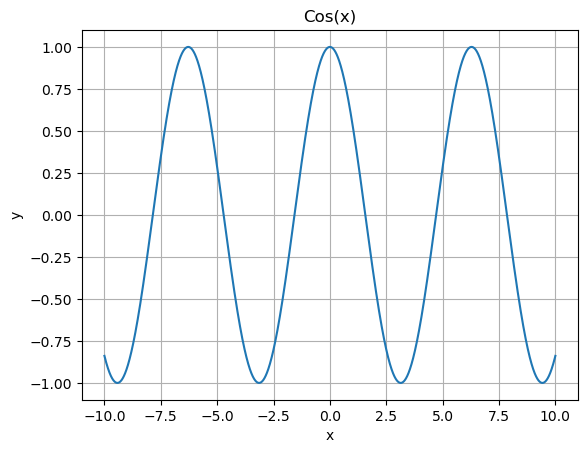

In [ ]:
clf() # Limpia la figura
xlabel("x")
ylabel("y")
title("Cos(x)")
grid("on")
plot(x,y)
gcf()

## Graficas usando PyPlot: Ejemplo 2

En este ejemplo se muestra como converge el metodo de los babilonios a la raiz cuadrada deseada.

In [9]:
list=zeros(30);
S=10000;
x=0.0001;
for i in 1:30
    x=0.5(x+S/x);
    list[i]=x;
end

In [10]:
x=linspace(0,30,100);
y=sqrt(S)*ones(length(x));

In [ ]:
scatter(1:30,list);
plot(x,y);
#xlim(0,30);

## Graficas usando PyPlot: Ejemplo 3

Gráfica que muestra las intersecciones de $x \tan(x)$ y $\sqrt(A-x^2)$

In [28]:
@doc range

```
range(start, stop, length)
range(start, stop; length, step)
range(start; length, stop, step)
range(;start, length, stop, step)
```

Construct a specialized array with evenly spaced elements and optimized storage (an [`AbstractRange`](@ref)) from the arguments. Mathematically a range is uniquely determined by any three of `start`, `step`, `stop` and `length`. Valid invocations of range are:

  * Call `range` with any three of `start`, `step`, `stop`, `length`.
  * Call `range` with two of `start`, `stop`, `length`. In this case `step` will be assumed to be one. If both arguments are Integers, a [`UnitRange`](@ref) will be returned.
  * Call `range` with one of `stop` or `length`. `start` and `step` will be assumed to be one.

See Extended Help for additional details on the returned type. See also [`logrange`](@ref) for logarithmically spaced points.

# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96

julia> range(stop=10, length=5)
6:10

julia> range(stop=10, step=1, length=5)
6:1:10

julia> range(start=1, step=1, stop=10)
1:1:10

julia> range(; length = 10)
Base.OneTo(10)

julia> range(; stop = 6)
Base.OneTo(6)

julia> range(; stop = 6.5)
1.0:1.0:6.0
```

If `length` is not specified and `stop - start` is not an integer multiple of `step`, a range that ends before `stop` will be produced.

```jldoctest
julia> range(1, 3.5, step=2)
1.0:2.0:3.0
```

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


!!! compat "Julia 1.7"
    The versions without keyword arguments and `start` as a keyword argument require at least Julia 1.7.


!!! compat "Julia 1.8"
    The versions with `stop` as a sole keyword argument, or `length` as a sole keyword argument require at least Julia 1.8.


# Extended Help

`range` will produce a `Base.OneTo` when the arguments are Integers and

  * Only `length` is provided
  * Only `stop` is provided

`range` will produce a `UnitRange` when the arguments are Integers and

  * Only `start`  and `stop` are provided
  * Only `length` and `stop` are provided

A `UnitRange` is not produced if `step` is provided even if specified as one.

```
range(start::T; stop::T, length=100) where T<:Colorant
range(start::T, stop::T; length=100) where T<:Colorant
```

Generates N (=`length`) >2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.



In [31]:
@doc complex

```
complex(r, [i])
```

Convert real numbers or arrays to complex. `i` defaults to zero.

# Examples

```jldoctest
julia> complex(7)
7 + 0im

julia> complex([1, 2, 3])
3-element Vector{Complex{Int64}}:
 1 + 0im
 2 + 0im
 3 + 0im
```

```
complex(T::Type)
```

Return an appropriate type which can represent a value of type `T` as a complex number. Equivalent to `typeof(complex(zero(T)))` if `T` does not contain `Missing`.

# Examples

```jldoctest
julia> complex(Complex{Int})
Complex{Int64}

julia> complex(Int)
Complex{Int64}

julia> complex(Union{Int, Missing})
Union{Missing, Complex{Int64}}
```


In [30]:
x=range(-10,10,step=0.001);
y1=sqrt.(complex(100.0-x.^2));
y2=x.*tan.(x);
y3=y2-y1;

MethodError: MethodError: no method matching -(::Float64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
The function `-` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  -(::Real, !Matched::Complex{Bool})
   @ Base complex.jl:324
  -(!Matched::PyCall.PyObject, ::Any)
   @ PyCall ~/.julia/packages/PyCall/1gn3u/src/pyoperators.jl:13
  -(::Any, !Matched::PyCall.PyObject)
   @ PyCall ~/.julia/packages/PyCall/1gn3u/src/pyoperators.jl:14
  ...


In [ ]:
plot(x,y1)
plot(x,y2)
ylim(0,20)
show();

In [ ]:
plot(x,y3)
ylim(-10,10)
show()

## Graficas usando PyPlot: Ejemplo 4

In [15]:
"""
Calcula las raices para el pozo finito con A=10.0
"""
function raices_pozo_finito(init)
    list=zeros(Complex64,100);
    x=init;
    for i in 1:100
        f= complex(x*tan(x)-sqrt(complex(10-x^2)))
        df=complex(x*sec(x)^2+x/sqrt(complex(10.0-x^2))+tan(x)) # Esto lo hice para evitar errores de dominio
        x=x-f/df;
        list[i]=x;
    end
    return list
end;

In [16]:
list1=raices_pozo_finito(0.1);
list2=raices_pozo_finito(1.1);
list3=raices_pozo_finito(1.5);
list4=raices_pozo_finito(3.5);

In [ ]:
yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

# Usando Julia como CAS llamando a SymPy

Si todavia no contamos con la libreria en nuestra biblioteca, podemos añadirla haciendo:

In [48]:
using SymPy

Primero definimos las variables simbólicas que vamos a usar:

In [49]:
A,x,a,n,m=symbols("A,x,a,n,m")

(A, x, a, n, m)

In [50]:
typeof(n)

Sym{PyObject}

Evaluando la suma sugerida en el exámen

In [51]:
summation(a^n,(n,0,oo))

⎧   1                 
⎪ ─────    for │a│ < 1
⎪ 1 - a               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    n             
⎪  ╱   a    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪n = 0                
⎩                     

## Cálculo

In [116]:
limit(sin(x)/x, x=>0)

1

In [120]:
integrate(x,x)

 2
x 
──
2 

In [117]:
integrate(x,(x,0,1))

1/2

In [118]:
diff(sin(x),x)

cos(x)

In [119]:
typeof(diff(sin(x),x))

Sym{PyObject}

Si $x$ es simbólica y llamamos al $\sin$, Julia autómaticamente usa la función apropiada:

Manipulación y simplificación de expresiones

In [62]:
expression = diff(x*tan(x)-sqrt(A-x^2),x)

  ⎛   2       ⎞        x              
x⋅⎝tan (x) + 1⎠ + ─────────── + tan(x)
                     ________         
                    ╱      2          
                  ╲╱  A - x           

In [63]:
f=simplify(expression)

   x           x              
─────── + ─────────── + tan(x)
   2         ________         
cos (x)     ╱      2          
          ╲╱  A - x           

In [64]:
simplify(sin(2*PI*n))

0

In [65]:
n = symbols("n", integer=true)

n

In [66]:
n = symbols("n", integer=true)
simplify(sin(PI*2*n))

0

In [114]:
simplify(sin(x)*tan(x)/sec(x))

   2   
sin (x)

In [67]:
collect(f,x)

  ⎛   1           1     ⎞         
x⋅⎜─────── + ───────────⎟ + tan(x)
  ⎜   2         ________⎟         
  ⎜cos (x)     ╱      2 ⎟         
  ⎝          ╲╱  A - x  ⎠         

In [71]:
expr = x^2 + 2*x*y + y^2 + x + y

# Collect terms with respect to x
collected_expr = collect(expr, x)

collected_expr

 2                  2    
x  + x⋅(2⋅y + 1) + y  + y

In [73]:
# Define the expression
expr = x^2 - 5*x + 6

# Factor the expression
factored_expr = factor(expr)

factored_expr

(x - 3)⋅(x - 2)

In [109]:
# Expandir expresiones
expand((x + 1)^2)

 2          
x  + 2⋅x + 1

In [113]:
(x^2 + 2*x + 1)/(x^2 + x)

 2          
x  + 2⋅x + 1
────────────
    2       
   x  + x   

In [112]:
# Cancelar expresiones
cancel((x^2 + 2*x + 1)/(x^2 + x))

x + 1
─────
  x  

## Manipulación de funciones

In [75]:
f2=subs(f,A=>10.0)

   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

Lo que pasa si evaluamos en otra variable simbólica:

In [76]:
f2(n)

   n      0.316227766016838⋅n         
─────── + ─────────────────── + tan(n)
   2           ____________           
cos (n)       ╱          2            
            ╲╱  1 - 0.1⋅n             

Uno puede evaluar directamente la función en un valor númerico, sin embargo el _output_ sigue siendo un objeto simbólico:

In [77]:
res = f2(0.1)

0.232979976586117

In [78]:
typeof(res)

Sym{PyObject}

Como convertir números de _SymPy_ a flotantes:

In [79]:
resf = N(res)

0.2329799765861167

In [80]:
typeof(resf)

Float64

Podemos pasar el resultado a otra función y se sigue tratando como un objeto simbólico:

In [84]:
cos(f2(0.1))

0.972982705126180

Con la función _lambify_ podemos convertir una función de SymPy directamente en una función de Julia,típicamente hacer esto nos permite hacer rutinas mas eficientes:

In [85]:
@show f2

f2 = x/cos(x)^2 + 0.316227766016838*x/sqrt(1 - 0.1*x^2) + tan(x)


   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

In [86]:
fjulia=lambdify(f2)

Callable function with a single variable x

In [87]:
res = fjulia(0.1) #recordar que viene de una derivada

0.23297997658611666

In [88]:
typeof(res)

Float64

Otra forma de declarar variables simbólicas:

In [89]:
@syms x y z

(x, y, z)

In [90]:
typeof(x)

Sym{PyObject}

Podemos comprobar que todo salio bien haciendo la derivada númerica:

In [91]:
function ff(x)
    A=10.0
    return  x*tan(x)-sqrt(A-x^2)
end

ff (generic function with 1 method)

In [92]:
(ff(0.1+0.00001)-ff(0.1))/0.00001

0.23299176210578307

Si queremos convertir funciones de Julia en funciones de SymPy, podemos hacer los siguiente:

Primero definimos una función en Julia:

In [93]:
function r(x)
   return x^2 
end;

Luego, como ya definimos $x$ como una variable simbólica, simplemente evaluamos nuestra función en dicha variable:

In [94]:
r(x)

 2
x 

In [95]:
typeof(r(x))

Sym{PyObject}

Ya podemos, por ejemplo, derivar sin problema:

In [96]:
diff(r(x),x)

2⋅x

In [97]:
diff(cos(r(x)),x)

        ⎛ 2⎞
-2⋅x⋅sin⎝x ⎠

## Solución de ecuaciones algebráicas

In [136]:
solve(x^2 - x, x)

2-element Vector{Sym{PyObject}}:
 0
 1

In [137]:
# Define the equation
eq = Eq(x^2 - 5*x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

2-element Vector{Sym{PyObject}}:
 2
 3

In [138]:
typeof(solutions)

Vector{Sym{PyObject}} (alias for Array{Sym{PyObject}, 1})

In [139]:
solutions[1]

2

In [147]:
eq1 = Eq(x + y, 10)
eq2 = Eq(x - y, 2)

# Solve the system of equations
solutions = solve([eq1, eq2], [x, y])

solutions

Dict{Sym{PyObject}, Sym{PyObject}} with 2 entries:
  y => 4
  x => 6

In [142]:
typeof(solutions)

Dict{Sym{PyObject}, Sym{PyObject}}

In [148]:
solutions[x]

6

In [149]:
solutions[y]

4

In [150]:
# Define the equation
eq = Eq(x^4 - 5*x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

4-element Vector{Sym{PyObject}}:
 -sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2 + sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) - 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2
  sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2 - sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) + 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2
 -sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) - 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2 - sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2
  sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) + 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2 + sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2

In [152]:
# Define the equation
eq = Eq(4x^5-x^4 - 5*x^2+3x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

5-element Vector{Sym{PyObject}}:
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 0)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 1)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 2)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 3)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 4)

In [153]:
solutions[1]

       ⎛   5    4      2             ⎞
CRootOf⎝4⋅x  - x  - 5⋅x  + 3⋅x + 6, 0⎠

In [154]:
typeof(solutions[1])

Sym{PyObject}

In [158]:
N(solutions[1])

-0.7318367457018344

A continuación un símbolo útil

In [160]:
solutions[1]|>N

-0.7318367457018344

## Ecuaciones diferenciales

In [190]:
f = SymFunction("f")(x)

# Differentiate the symbolic function with respect to x
diff_f = diff(f, x)

d       
──(f(x))
dx      

In [193]:
diff(f)

d       
──(f(x))
dx      

Problemas de valor inicial

In [202]:
dsolve(diff(f,x,x) - f(x), f(x))

           -x       x
f(x) = C₁⋅ℯ   + C₂⋅ℯ 

In [201]:
ics = Dict(f(0) => 1, diff(f)(0) => 2)

Dict{Sym{PyObject}, Int64} with 2 entries:
  f(0)                            => 1
  Subs(Derivative(f(x), x), x, 0) => 2

In [204]:
ics = Dict(f(0) => 1, diff(f)(0) => 2)

dsolve(diff(f,x,x) - f(x), f(x), ics=ics)

          x    -x
       3⋅ℯ    ℯ  
f(x) = ──── - ───
        2      2 

In [472]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
E = symbols("E", real=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the Schrödinger equation
schrodinger_eq = Eq(-ħ^2 / (2*m) * diff(ψ, x, x), E * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ)

println(solution)

Eq(ψ(x), C1*exp(-sqrt(2)*sqrt(m)*x*sqrt(-E)/ħ) + C2*exp(sqrt(2)*sqrt(m)*x*sqrt(-E)/ħ))


In [432]:
diff(ψ,x)(1)

⎛d       ⎞│   
⎜──(ψ(x))⎟│   
⎝dx      ⎠│x=1

In [434]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
E = symbols("E", real=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the boundary conditions
ics = Dict(ψ(0) => 0, ψ(1) => 0)
# Define the Schrödinger equation
schrodinger_eq = Eq(-diff(ψ, x, x), E * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ, ics = ics)
simplify(solution)

ψ(x) = 0

Solo nos da soluciones triviales

In [593]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
E = symbols("E", real=true, positive=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the boundary conditions
ics = Dict(ψ(0) => 0, ψ(1) => 0)
# Define the Schrödinger equation
schrodinger_eq = Eq(-diff(ψ, x, x), E * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ)

ψ(x) = C₁⋅sin(√E⋅x) + C₂⋅cos(√E⋅x)

In [594]:
sol = solution.rhs

C₁⋅sin(√E⋅x) + C₂⋅cos(√E⋅x)

In [507]:
sol.free_symbols

Set{Sym} with 4 elements:
  C1
  C2
  E
  x

Más funciones de simplificación

Como evaluar las soluciones:

In [508]:
a, b, c, d = symbols("a b c d")

(a, b, c, d)

In [513]:
sol(a,b,c,d)

a⋅sin(√c⋅d) + b⋅cos(√c⋅d)

Cuidado con lo de arriba, el orden parece que siempre es el orden en el que están los símbolos en la expresión

In [598]:
sol*sol'|>simplify

                              ⎛          __             __⎞
(C₁⋅sin(√E⋅x) + C₂⋅cos(√E⋅x))⋅⎝sin(√E⋅x)⋅C₁ + cos(√E⋅x)⋅C₂⎠

In [599]:
# Define real versions of C1 and C2
C1 = symbols("C1", real=true)
C2 = symbols("C2", real=true)

C₂

In [600]:
sol = sol(C1,C2)

C₁⋅sin(√E⋅x) + C₂⋅cos(√E⋅x)

In [601]:
sol*sol'|>simplify

                             2
(C₁⋅sin(√E⋅x) + C₂⋅cos(√E⋅x)) 

In [602]:
sol*sol'|>expand

  2    2                                         2    2      
C₁ ⋅sin (√E⋅x) + 2⋅C₁⋅C₂⋅sin(√E⋅x)⋅cos(√E⋅x) + C₂ ⋅cos (√E⋅x)

In [603]:
solve(sol.subs(x,0), C2)

1-element Vector{Sym{PyObject}}:
 0

In [604]:
sol = sol.subs(C2, 0)

C₁⋅sin(√E⋅x)

In [605]:
solve(sol.subs(x,1), E)

1-element Vector{Sym{PyObject}}:
 pi^2

In [608]:
solveset(sol.subs(x,1), E)

{E │ E ∊ ℂ ∧ (sin(√E) = 0)}

In [611]:
solveset(sol.subs(x,1), E, domain=SymPy.sympy.Reals)

⎧ 2 │                             ⎫   ⎧ 2 │                                 ⎫
⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π │ n ∊ ℤ}⎬ ∪ ⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π + π │ n ∊ ℤ}⎬
⎩   │                             ⎭   ⎩   │                                 ⎭

In [577]:
eq = sin(sqrt(E))  # Ignore C1 since it can be zero
E_sol = solve(eq, E)


2-element Vector{Sym{PyObject}}:
    0
 pi^2

In [579]:
eq

sin(√E)

In [591]:
eq = sin(sqrt(E))  # Ignore C1 since it can be zero
E_sol = solveset(eq-1, E, domain=SymPy.sympy.Reals)
@show E_sol


E_sol = ImageSet(Lambda(x, x^2), Intersection(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), Interval(0, oo)))


⎧ 2 │              ⎧        π │      ⎫⎫
⎨x  │ x ∊ [0, ∞) ∩ ⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬⎬
⎩   │              ⎩        2 │      ⎭⎭

In [557]:
@show E_sol

E_sol = ConditionSet(E, Eq(sin(sqrt(E)), 0), Complexes)


{E │ E ∊ ℂ ∧ (sin(√E) = 0)}

In [569]:
using SymPy

# Define the symbol
E = symbols("E", real=true)

# Solve the equation sin(sqrt(E)) = 0
sol = solveset(sin(sqrt(E)), E, domain=SymPy.sympy.Reals)

sol


⎧ 2 │                             ⎫   ⎧ 2 │                                 ⎫
⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π │ n ∊ ℤ}⎬ ∪ ⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π + π │ n ∊ ℤ}⎬
⎩   │                             ⎭   ⎩   │                                 ⎭

In [567]:
SymPy.sympy.Reals

ℝ